# Example of forecast verification for a continuous variable with a forecast probability density function: the Continuous Rank Probability Score (CRPS)

In [126]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [127]:
# Dummy variable for the random variable
dx = 0.01
# Support
xmin, xmax = 0, 10
x = np.arange(-10, 10, dx)

In [128]:
                    # Name         # Forecast PDF
dataForecasts =  {  "John":        norm.pdf(x, loc = 2, scale = 1)     ,
                    "Mary":        ((x > 4) * (x <= 6)) * np.ones(len(x)) * 0.5  ,    
                    "Bill":        norm.pdf(x, loc = 3, scale = 0.5)   ,
                    "Amanda":        norm.pdf(x, loc = 5, scale = 0.5)   ,
                    "Jeff":        norm.pdf(x, loc = 2, scale = 0.1)   ,
                    "Dave":        ((x > 3) * (x <= 4)) * np.ones(len(x))    ,
                    "George":        norm.pdf(x, loc = 4 , scale = 2)   ,
                 }

nForecasts    = len(dataForecasts)

John
Mary
Bill
Amanda
Jeff
Dave
George


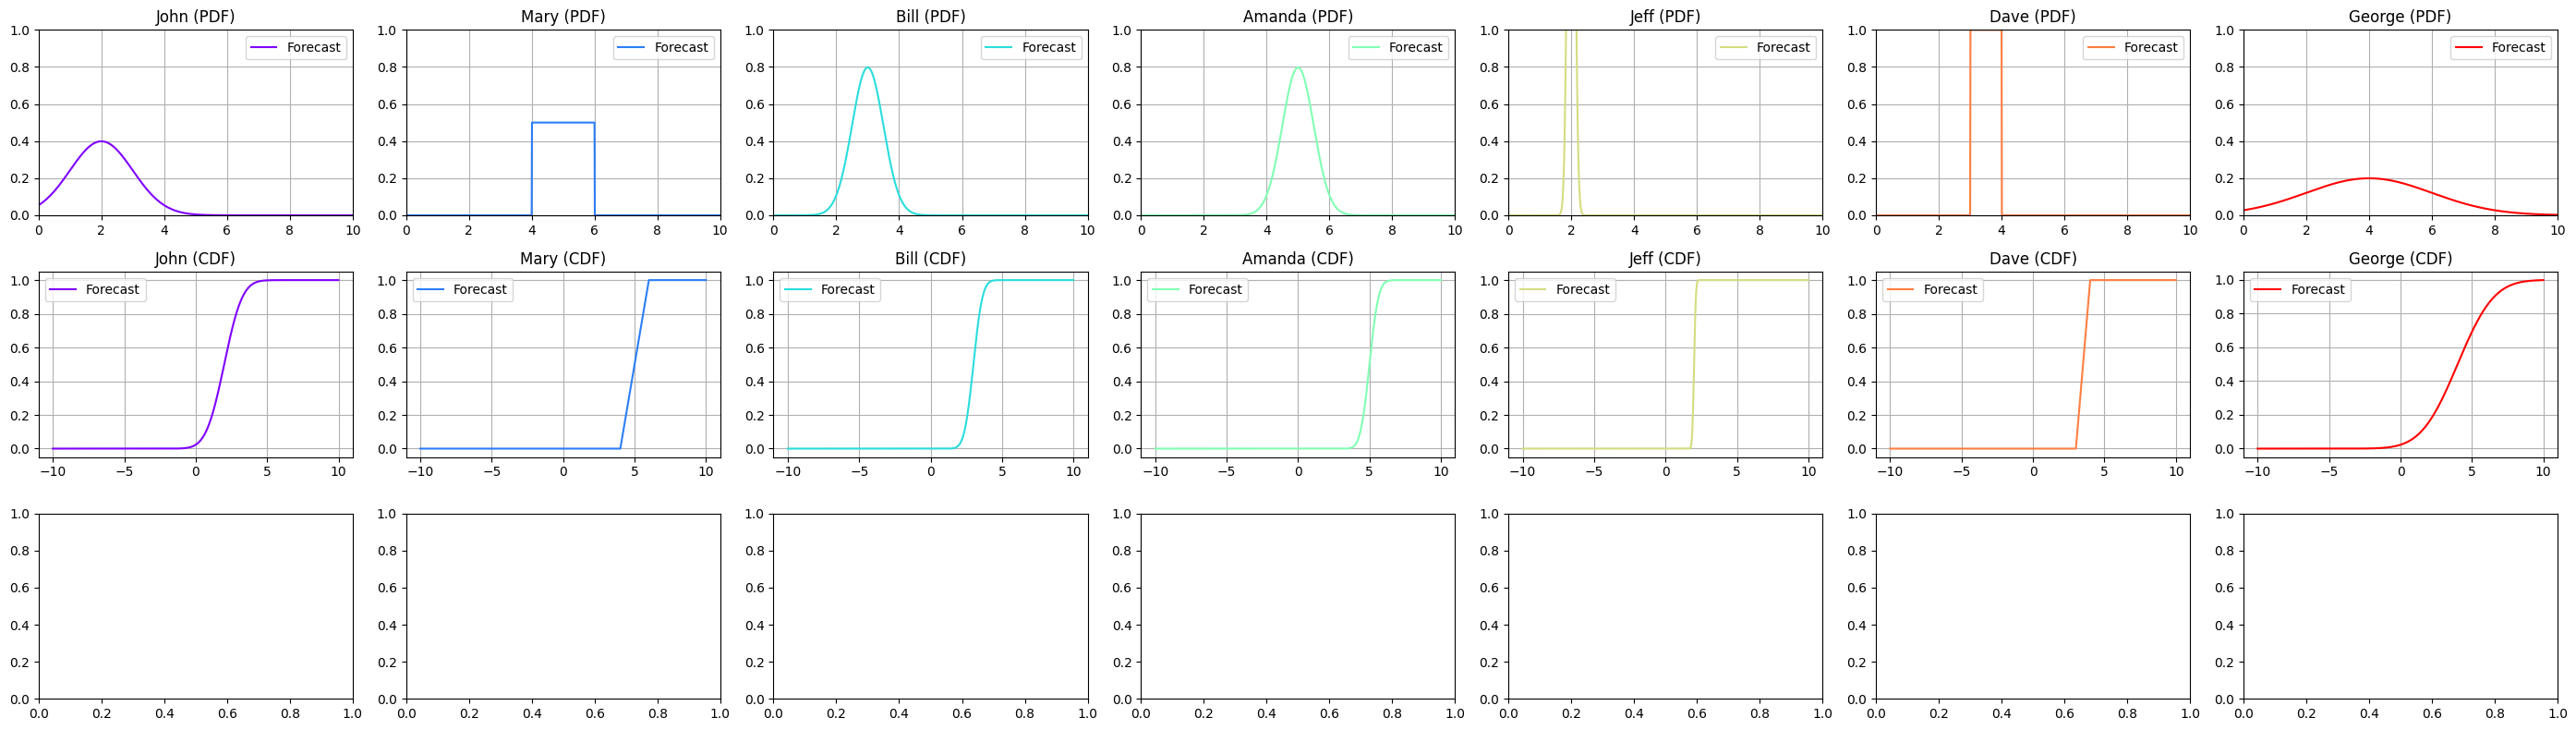

In [129]:
# Draw the PDFs
fig, ax = plt.subplots(3, nForecasts, figsize = (nForecasts * 4, 8))
color = plt.cm.rainbow(np.linspace(0, 1, nForecasts))

for jForecast, d in enumerate(dataForecasts):

    # Top row: PDFs
    thisAx = ax[0, jForecast]
    print(d)
    thisPDF = dataForecasts.get(d)
    thisAx.plot(x, thisPDF, color = color[jForecast], label = "Forecast")

    thisAx.grid()
    thisAx.set_ylim(0, 1.0)
    thisAx.set_xlim(0.0, 10.0)
    thisAx.set_title(d + " (PDF)")
    thisAx.legend()


    # Bottom row : CDFs
    thisAx = ax[1, jForecast]
    thisCDF= np.cumsum(thisPDF) * dx
    thisAx.plot(x, thisCDF, color = color[jForecast], label = "Forecast")
    thisAx.set_title(d + " (CDF)")
    thisAx.grid()
    thisAx.legend()


fig.tight_layout()
#fig.savefig("fig.png", dpi = 300)

In [130]:
# Enter verification value
verification = 2.5
verificationCDF = np.ones(len(x)) * (x >= verification)  

# Continuous rank probability score
$CRPS = \int_{-\infty}^{+\infty} \left(F(x) - H(x-o)\right)^2\textrm{d}x $

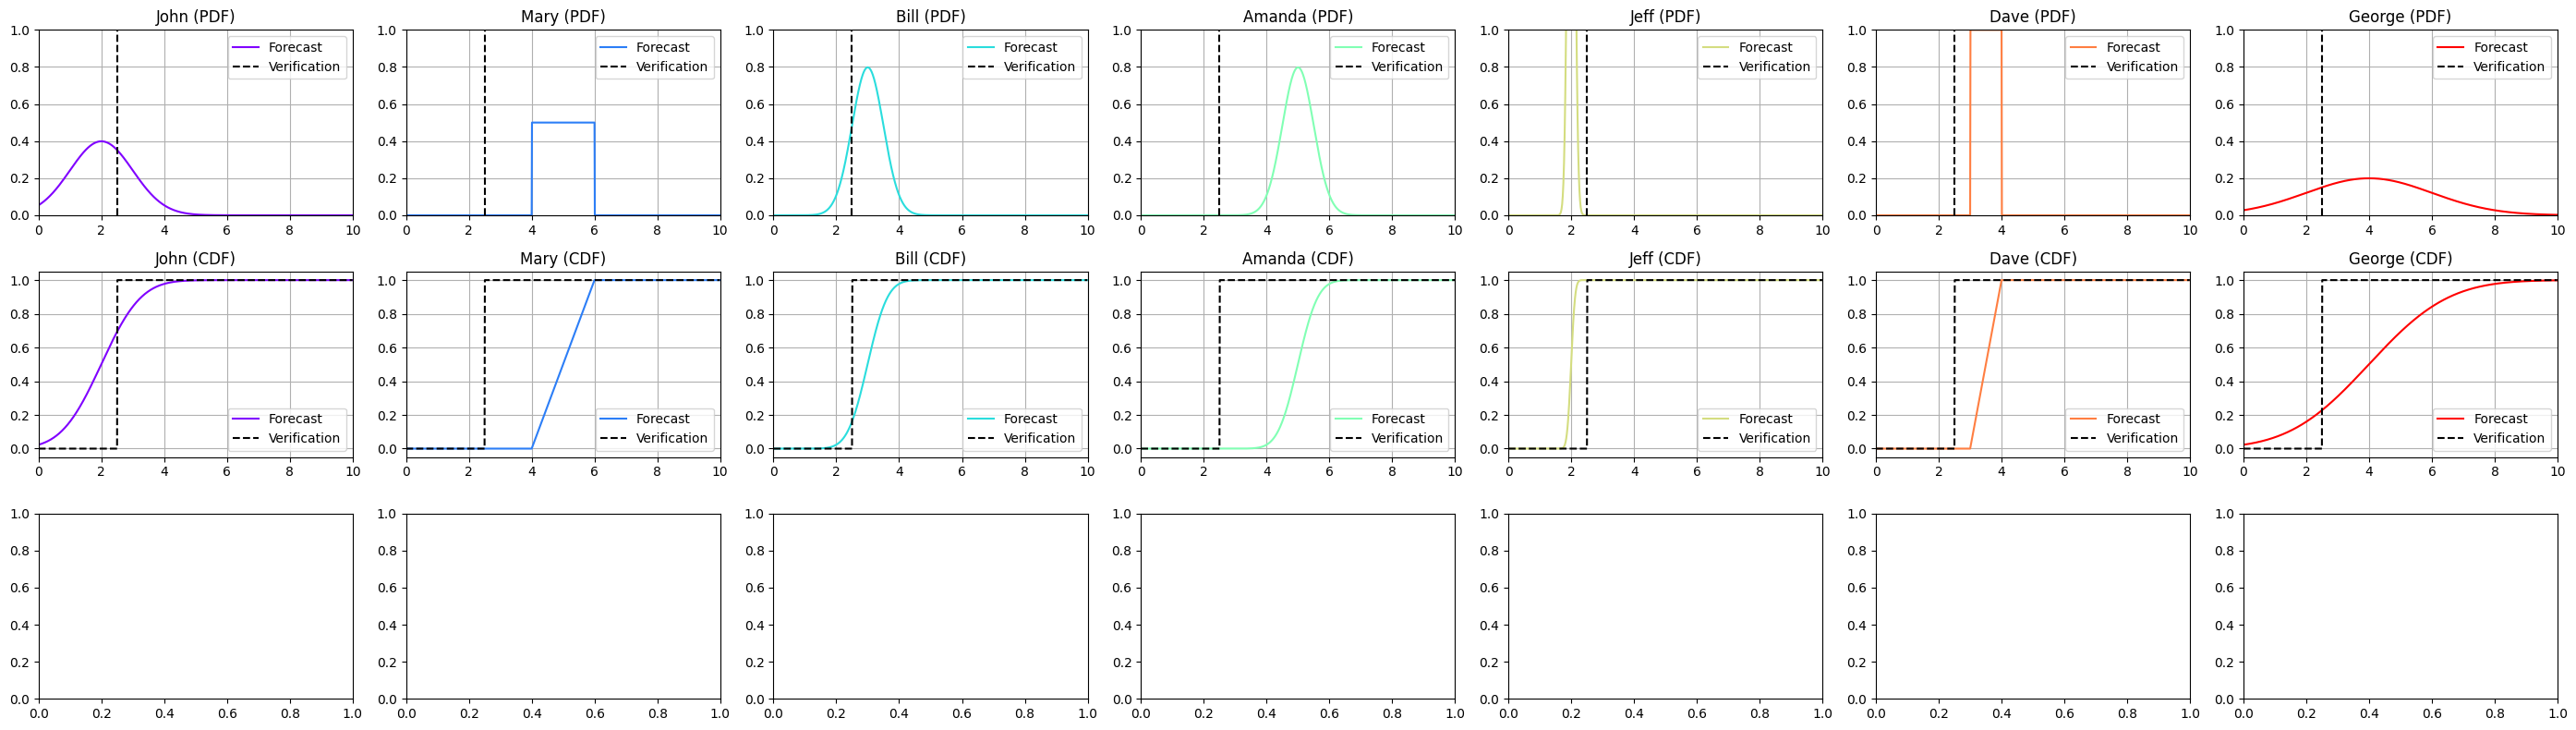

In [131]:
# Add the Heaviside function to the plots
plt.figure(fig)
for jForecast, d in enumerate(dataForecasts):

    # Top row: PDFs
    thisAx = ax[0, jForecast]
    thisAx.plot((verification, verification), (0, 1e9), color = "black", linestyle = "--", label = "Verification")

    thisAx.set_ylim(0, 1.0)
    thisAx.set_xlim(0.0, 10.0)
    thisAx.legend()


    # Bottom row : CDFs
    thisAx = ax[1, jForecast]
    thisAx.plot(x, verificationCDF, color = "black", linestyle = "--", label = "Verification")
    thisAx.set_xlim(0.0, 10.0)
    thisAx.legend()

    #thisAx.set_title(d + " (CDF)")

plt.show(fig)

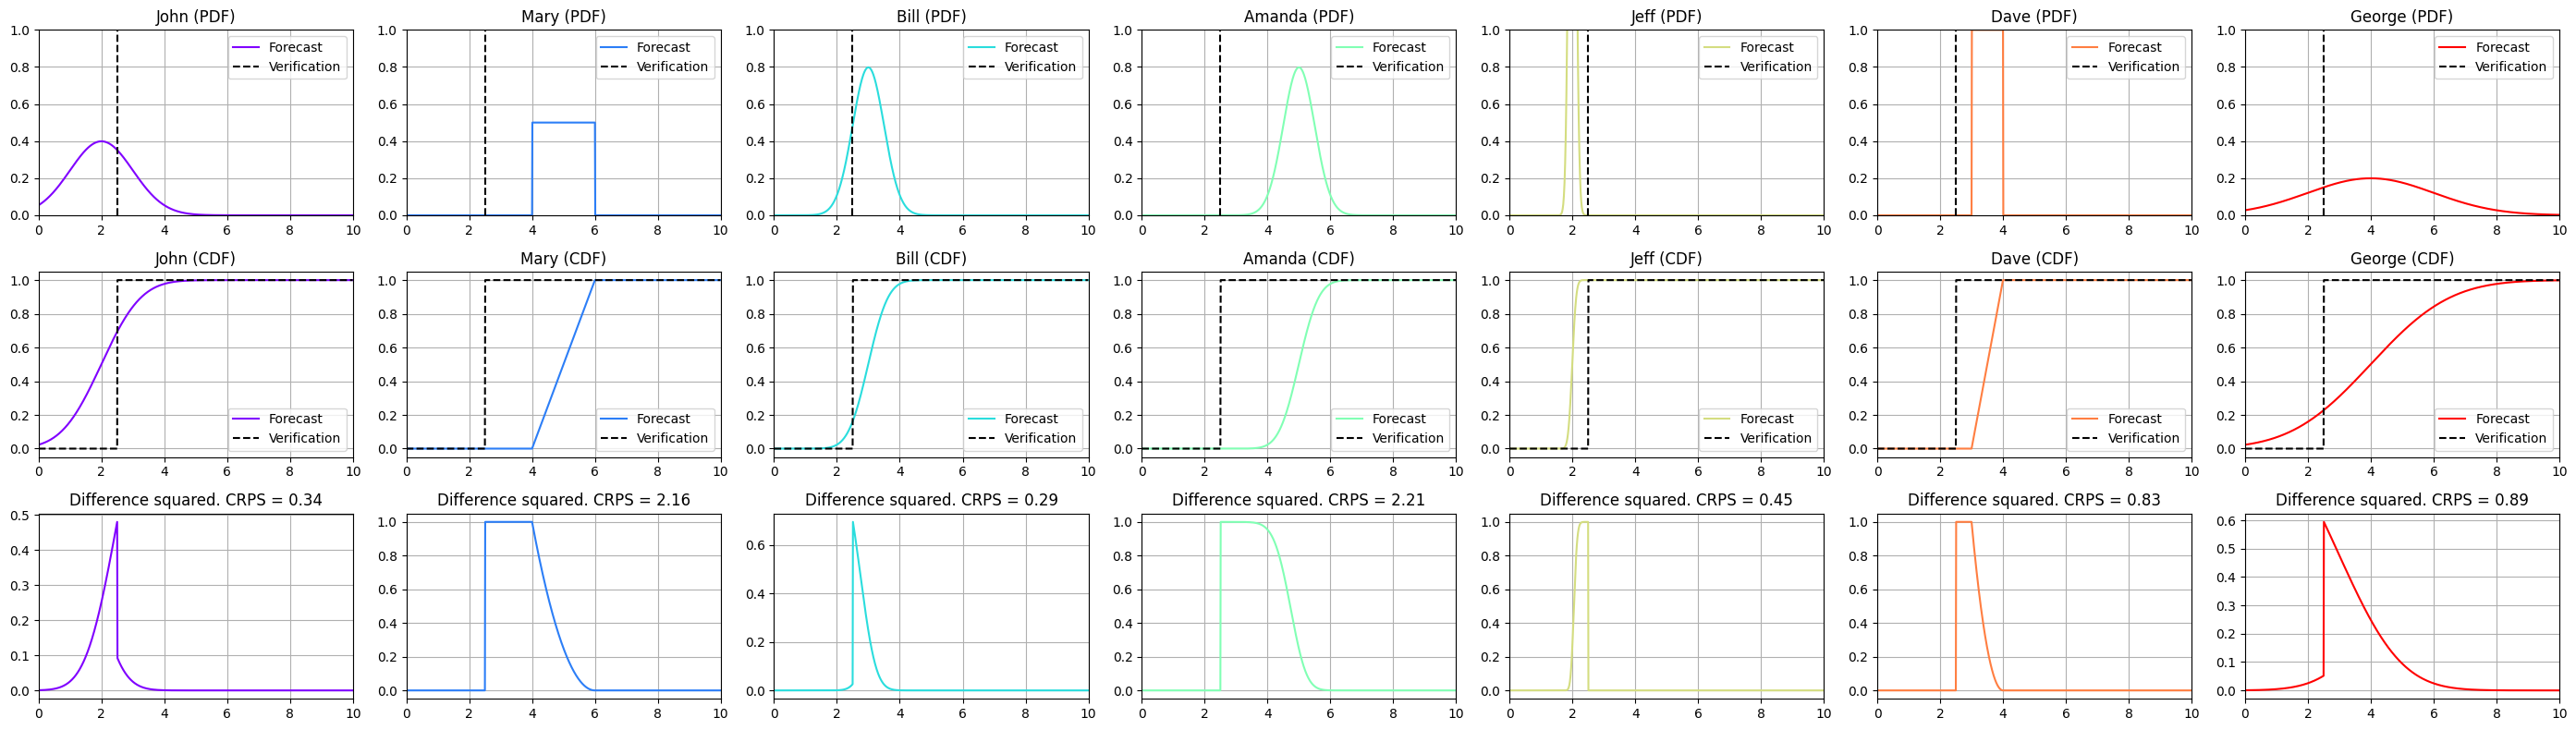

In [132]:
# Plot difference squared
plt.figure(fig)
for jForecast, d in enumerate(dataForecasts):
    thisAx = ax[2, jForecast]
    thisPDF = dataForecasts.get(d)    
    thisCDF= np.cumsum(thisPDF) * dx

    thisAx.plot(x, (thisCDF - verificationCDF) ** 2, color = color[jForecast])
    thisAx.set_xlim(0.0, 10.0)
    thisAx.set_title("Difference squared")
    thisAx.grid()

    thisCRPS = np.sum(dx * (thisCDF - verificationCDF) ** 2 )

    thisAx.set_title("Difference squared. CRPS = " + str(np.round(thisCRPS, 2)))
  
plt.show(fig)